import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

# The content of this notebook comes from the CMU course "Optimal-Control-16-745" from Zachary Manchester:

https://github.com/Optimal-Control-16-745/lecture-notebooks/blob/main/Lecture%203/minimization.ipynb

# Lecture 3 — Minimization via Newton's Method 
## Key ideas:
### • ∂f/∂x is a row vector; we use ∇f(x) = (∂f/∂x)^T (column)
### • Newton for minimization solves: H(x) Δx = -∇f(x)
### • Update: x ← x + Δx, where H = ∇²f is the Hessian
### • If H ≻ 0 (positive definite), the Newton step is a descent direction
### • Regularization ("damped Newton"): add βI until H ≽ 0 to guarantee descent 
### • Line Search: avoid overshooting a minima

In [1]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [2]:
"""
f(x)


Scalar objective used to illustrate Newton's method on a nonconvex quartic.
 

f(x) = x^4 + x^3 - x^2 - x


This function has both minima and maxima, so a naive Newton step can ascend if
`∇²f(x) < 0` at the current iterate (see lecture notes on sufficient conditions).
"""

function f(x)
    return x.^4 + x.^3 - x.^2 - x
end

f (generic function with 1 method)

In [3]:
"""
∇f(x)

Analytic gradient (first derivative) of `f`.
"""
function ∇f(x)
    return 4.0*x.^3 + 3.0*x.^2 - 2.0*x - 1.0
end

∇f

In [4]:
"""
Analytic Hessian (second derivative) of `f`.
"""

function ∇2f(x)
    return 12.0*x.^2 + 6.0*x - 2.0
end

∇2f (generic function with 1 method)

In [5]:
x = LinRange(-1.75,1.25,1000)

1000-element LinRange{Float64, Int64}:
 -1.75, -1.747, -1.74399, -1.74099, …, 1.24099, 1.24399, 1.247, 1.25

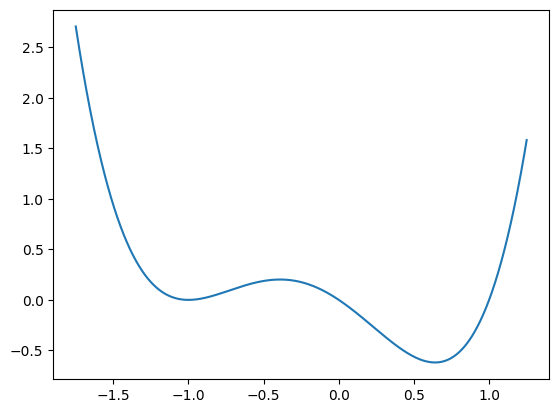

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x15cd0bfd0>

In [6]:
p = plot(x,f(x))

In [7]:
function newton_step(x0)
    xn = x0 - ∇2f(x0)\∇f(x0)
end

newton_step (generic function with 1 method)

### Let's check that our newton step implementation is doing what we expect should happen in a "nice region" of the function (think basin of attractions).

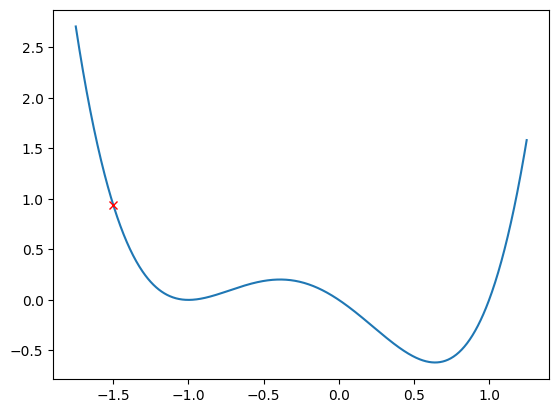

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x15d368490>

In [8]:
xguess = -1.5
plot(x, f(x))
plot(xguess, f(xguess), "rx")


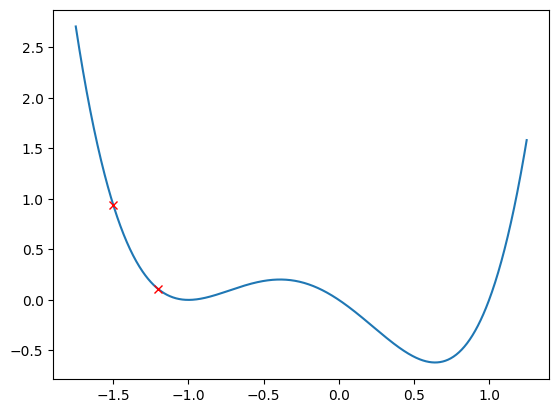

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x15d368760>
 PyObject <matplotlib.lines.Line2D object at 0x15d368850>

In [9]:
xnew = newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

## Let's now test out a different starting point for newton to motivate the need for "Globalization Strategies" to make newton work better and more generally!

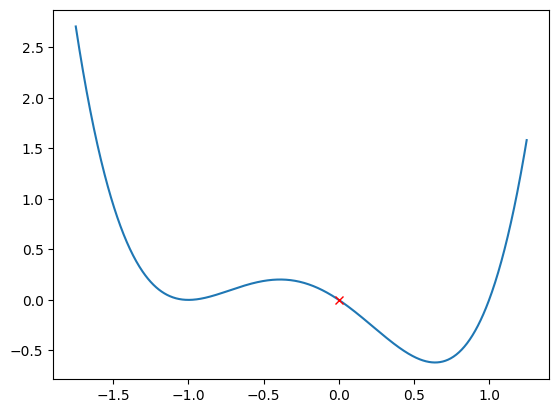

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x15f962950>

In [10]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

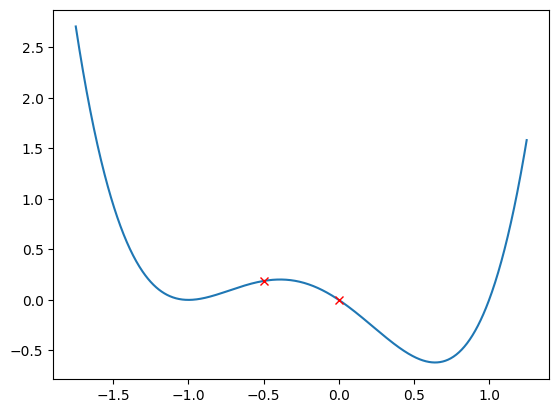

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x15f9f8700>
 PyObject <matplotlib.lines.Line2D object at 0x15f9f87f0>

In [11]:
xnew = newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

### Wow! Newton actually pushed us to a worse solution with a higher objective value.  Why?

# Globalization Strategy 1: Regularization

In [12]:
∇2f(0.0)

-2.0

In [13]:
function regularized_newton_step(x0)
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    xn = x0 - H\∇f(x0)
end

regularized_newton_step (generic function with 1 method)

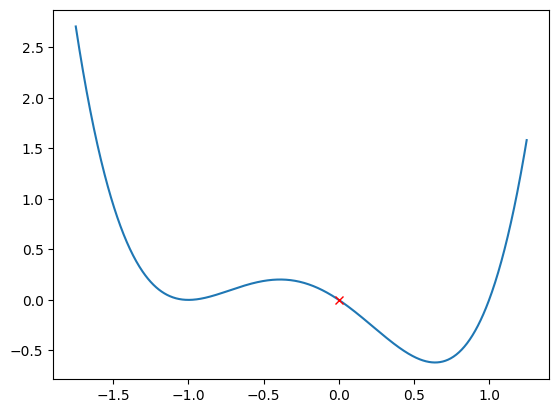

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x15fa75e10>

In [14]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

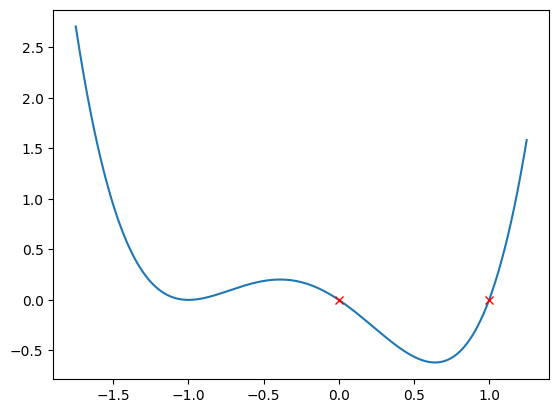

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x15fae7a30>
 PyObject <matplotlib.lines.Line2D object at 0x15fae7b20>

In [15]:
xnew = regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

### Ok this is better as we move to right direction of descent however we overshot the minima!  We will fix this with Line-Search

# Line-Search

In [16]:
function backtracking_regularized_newton_step(x0)
    b = 0.1
    c = 0.5
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    Δx = -H\∇f(x0)
    
    α = 1.0
    while f(x0 + α*Δx) > f(x0) + b*α*∇f(x0)*Δx
        α = c*α
    end
    print(α)
    xn = x0 + α*Δx
end

backtracking_regularized_newton_step (generic function with 1 method)

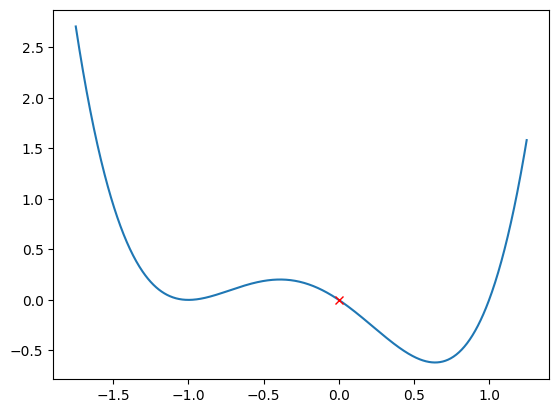

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x15fc096f0>

In [17]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

1.0

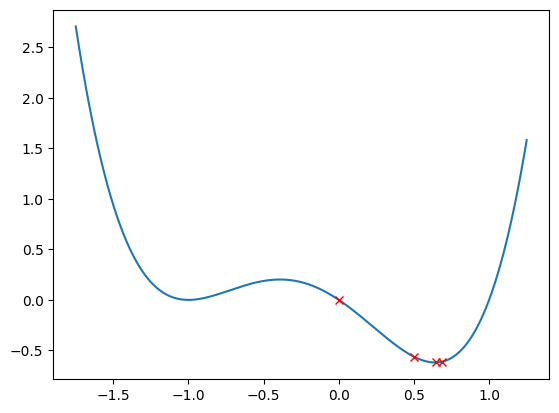

4-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x16d0b0700>
 PyObject <matplotlib.lines.Line2D object at 0x16d0b07f0>
 PyObject <matplotlib.lines.Line2D object at 0x16d0b0940>
 PyObject <matplotlib.lines.Line2D object at 0x16d0b0a90>

In [32]:
xnew = backtracking_regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")